## Group Activity 3: k-Means Algorithm: Expectation–Maximization

Expectation–maximization (E–M) is a powerful algorithm that comes up in a variety of contexts within data science.
*k*-means is a particularly simple and easy-to-understand application of the algorithm, and we will walk through it briefly here.
In short, the expectation–maximization approach here consists of the following procedure:

1. Guess some cluster centers
2. Repeat until converged
   1. *E-Step*: assign points to the nearest cluster center
   2. *M-Step*: set the cluster centers to the mean 

Here the "E-step" or "Expectation step" is so-named because it involves updating our expectation of which cluster each point belongs to.
The "M-step" or "Maximization step" is so-named because it involves maximizing some fitness function that defines the location of the cluster centers—in this case, that maximization is accomplished by taking a simple mean of the data in each cluster.

The literature about this algorithm is vast, but can be summarized as follows: under typical circumstances, each repetition of the E-step and M-step will always result in a better estimate of the cluster characteristics.

The *k*-Means algorithm is simple enough that we can write it in a few lines of code.
The following is a very basic implementation:

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

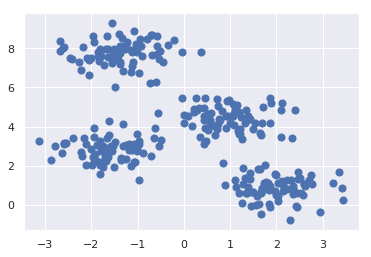

In [4]:
from sklearn.datasets.samples_generator import make_blobs
# X is the coordinates, y_true is the label
# we do have labels in the training dateset, because we need to turn K
# and also calculate accuracy
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
# print X
# print y_true
plt.scatter(X[:, 0], X[:, 1], s=50);

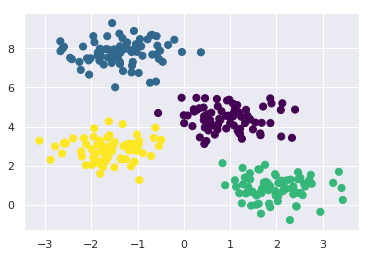

In [5]:


from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        #TODO Starts Here
        # 2a. Assign labels based on closest center
        # pairwise_distances_argmin compute the minimum distances between one point and a set of points.
        # Here is the URL for pairwise_distances_argmin https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances_argmin.html
        labels = #TODO#
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                # n_clusters is the function input, # of clusters
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        # Need to check if the K-means should stop
        if np.all(#TODO#):
            break
        centers = # TODO update centers#
        # TODO Ends here
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

### Caveats of expectation–maximization

There are a few issues to be aware of when using the expectation–maximization algorithm.

#### The globally optimal result may not be achieved
First, although the E–M procedure is guaranteed to improve the result in each step, there is no assurance that it will lead to the *global* best solution.
For example, if we use a different random seed in our simple procedure, the particular starting guesses lead to poor results:

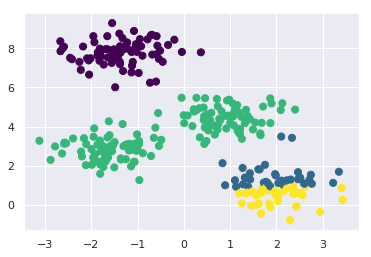

In [6]:
# K-means may not find out the global best solutions
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

Here the E–M approach has converged, but has not converged to a globally optimal configuration. For this reason, it is common for the algorithm to be run for multiple starting guesses, as indeed Scikit-Learn does by default (set by the ``n_init`` parameter, which defaults to 10).

Some other issues will be introduced in K-means jupyter notebook